### Explanatory factor analysis

In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.decomposition import FactorAnalysis

from sklearn import datasets

In [3]:
iris = datasets.load_iris()

X=iris.data
variable_names = iris.feature_names

X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
factor = FactorAnalysis().fit(X)

DF=pd.DataFrame(factor.components_,columns=variable_names)
print(DF)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.706989         -0.158005           1.654236           0.70085
1           0.115161          0.159635          -0.044321          -0.01403
2          -0.000000          0.000000           0.000000           0.00000
3          -0.000000          0.000000           0.000000          -0.00000


In [ ]:
'''
Factor 1 has highest loading for 'sepal length','petal length','petal width'
that means Factor 1 is highly influential on above mentioned 3 variables

remaining factors 2,3,4 has no high loading on any of the variables. so we should drop these factors during analysis.

'''

### PCA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
import pylab
from pylab import rcParams

import sklearn
from sklearn import datasets

In [8]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [9]:
iris = datasets.load_iris()
X=iris.data
variable_names = iris.feature_names

X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [10]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [12]:
pca.explained_variance_ratio_.sum()

1.0

In [ ]:
'''
explained variance ratio tells us how much information is compressed into the first few components
if we sum up the values of explained variance ration, we will get cumulative variance
in our case its 1, which means 100% of our dataset's info is captured in the 4 componets returned above.

but some of these info has redundance,outliers and noise
we need to get rid of that junk

now look at the explained variance ration
component 1 has appr 92.4% of information
component 2 has appr 0.05% of info
remaining 3,4 components are less info

so we get rid of 3&4 components to reduce junk
still we have adundant info in 1&2 componets for our analysis
'''

In [14]:
comps = pd.DataFrame(pca.components_,columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


<AxesSubplot:>

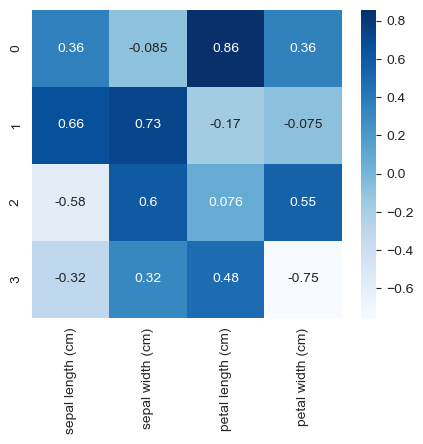

In [18]:
sb.heatmap(comps,cmap="Blues",annot=True)

In [ ]:
'''
from heatmap we can see which component is correlated with which variables

'''